In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#spx = yf.Ticker("^GSPC")
spx = yf.Ticker("SPY")
spx_data = spx.history(period="730d", interval="1D")  # Fetch hourly data for the last 730 days

In [3]:
# Convert to pandas DataFrame and set Datetime as index
spx_df = pd.DataFrame(spx_data)
spx_df.index = pd.to_datetime(spx_df.index)
spx_df.reset_index(inplace=True)

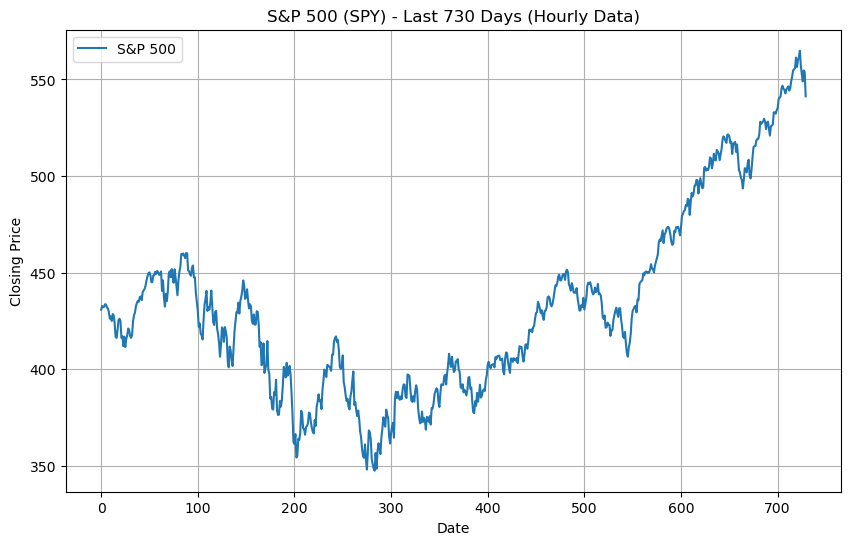

In [4]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(spx_df.index, spx_df['Close'], label='S&P 500')
plt.title('S&P 500 (SPY) - Last 730 Days (Hourly Data)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
spx_df['range'] =  spx_df['High']-spx_df['Low']
spx_df['range'] = round(spx_df['range'],2)
spx_df['Date'] = pd.to_datetime(spx_df['Date'])
spx_df['Date_only'] = spx_df['Date'].dt.date
spx_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,range,Date_only
0,2021-08-27 00:00:00-04:00,427.784980,431.162329,427.727577,430.779633,77235100,0.0,0.0,0.0,3.43,2021-08-27
1,2021-08-30 00:00:00-04:00,431.468550,433.477744,431.219783,432.674072,48357400,0.0,0.0,0.0,2.26,2021-08-30
2,2021-08-31 00:00:00-04:00,432.578409,432.922827,431.420741,432.033051,59300200,0.0,0.0,0.0,1.50,2021-08-31
3,2021-09-01 00:00:00-04:00,432.989779,433.515983,432.023445,432.262634,48721400,0.0,0.0,0.0,1.49,2021-09-01
4,2021-09-02 00:00:00-04:00,433.716973,434.415387,432.367943,433.592590,42501000,0.0,0.0,0.0,2.05,2021-09-02
...,...,...,...,...,...,...,...,...,...,...,...
725,2024-07-18 00:00:00-04:00,558.510010,559.520020,550.429993,552.659973,56270400,0.0,0.0,0.0,9.09,2024-07-18
726,2024-07-19 00:00:00-04:00,552.419983,554.080017,547.909973,548.989990,65509100,0.0,0.0,0.0,6.17,2024-07-19
727,2024-07-22 00:00:00-04:00,553.000000,555.270020,551.020020,554.650024,43346700,0.0,0.0,0.0,4.25,2024-07-22
728,2024-07-23 00:00:00-04:00,554.539978,556.739990,553.280029,553.780029,34439600,0.0,0.0,0.0,3.46,2024-07-23


In [6]:
# Calcular estadísticas descriptivas
range_stats = spx_df['range'].describe()

# Estadísticas adicionales
range_median = spx_df['range'].median()
range_variance = spx_df['range'].var()
range_skewness = spx_df['range'].skew()
range_kurtosis = spx_df['range'].kurt()

# Combinar todas las estadísticas en un DataFrame
additional_stats = pd.Series({
    'median': range_median,
    'variance': range_variance,
    'skewness': range_skewness,
    'kurtosis': range_kurtosis
})

# Concatenar las dos series
range_stats = pd.concat([range_stats, additional_stats])

# Redondear a 2 decimales
range_stats = range_stats.round(2)

# Imprimir las estadísticas
print(range_stats)

count       730.00
mean          5.35
std           2.79
min           0.76
25%           3.32
50%           4.69
75%           6.75
max          18.90
median        4.69
variance      7.81
skewness      1.37
kurtosis      2.49
dtype: float64


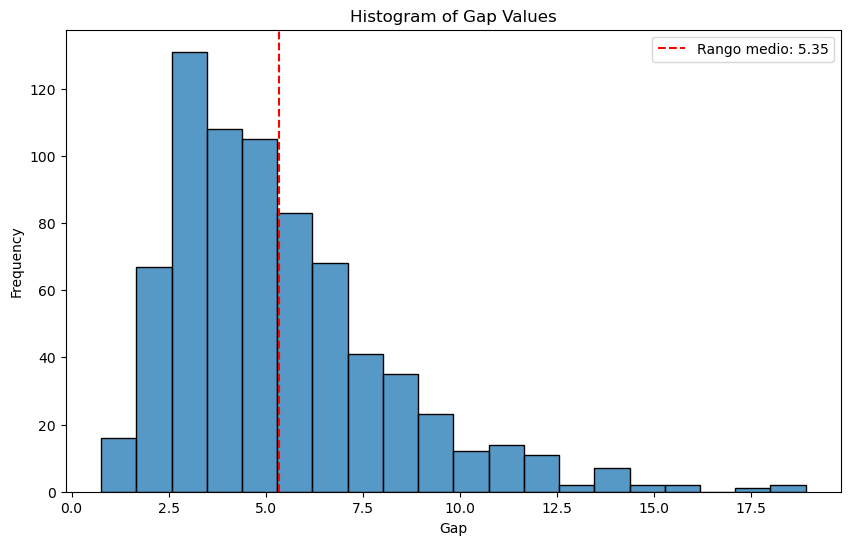

In [7]:
mean_value = spx_df['range'].mean()
plt.figure(figsize=(10, 6))
sns.histplot(spx_df['range'], bins=20, kde=False)
plt.title('Histogram of Gap Values')
plt.xlabel('Gap')
plt.ylabel('Frequency')
plt.axvline(mean_value, color='r', linestyle='--', label=f'Rango medio: {mean_value:.2f}')
plt.legend()
plt.show()

IMPORTACIÓN DE LOS DIAS CON IMPACTO

In [8]:
correlation_matrix_earnings = pd.read_csv('earnings_correlation_matrix.csv', index_col=0)
correlation_matrix_earnings

,date,players,counts,impact
0,2025-04-23,"['GOOG', 'INTC', 'ABBV', 'GOOGL', 'MSFT', 'TMU...",29,20.44
1,2023-07-25,"['GOOG', 'GOOGL', 'T', 'MSFT', 'EEFT', 'TXN', ...",27,19.80
2,2024-01-30,"['GOOG', 'AMD', 'GOOGL', 'MSFT', 'MA', 'SBUX',...",23,18.61
3,2025-01-28,"['GOOG', 'AMD', 'GOOGL', 'MSFT', 'MA', 'BA', '...",26,18.39
4,2022-07-26,"['GOOG', 'GOOGL', 'MSFT', 'GD', 'AEP', 'AMP', ...",25,17.44
5,2024-10-22,"['GOOG', 'GOOGL', 'META', 'TMUS', 'BA', 'GD', ...",43,15.22
6,2023-04-25,"['GOOGL', 'MSFT', 'TXN', 'GD', 'APH', 'ADP', '...",27,14.68
7,2024-07-23,"['GOOG', 'ENPH', 'GOOGL', 'T', 'TSLA', 'TXN', ...",30,14.35
8,2024-08-01,"['INTC', 'AMZN', 'SQ', 'AAPL', 'MCHP', 'CVX', ...",33,14.23
9,2024-10-30,"['MO', 'LANC', 'COP', 'LNG', 'AAPL', 'MCHP', '...",69,12.77


In [9]:
column_list = correlation_matrix_earnings['date'].tolist()
print(len(column_list))
column_list

43


['2025-04-23',
 '2023-07-25',
 '2024-01-30',
 '2025-01-28',
 '2022-07-26',
 '2024-10-22',
 '2023-04-25',
 '2024-07-23',
 '2024-08-01',
 '2024-10-30',
 '2023-10-24',
 '2024-10-21',
 '2025-04-29',
 '2025-01-30',
 '2024-07-30',
 '2024-02-01',
 '2024-04-25',
 '2022-10-25',
 '2025-04-27',
 '2023-04-26',
 '2022-07-28',
 '2024-10-23',
 '2023-01-24',
 '2022-10-27',
 '2023-08-03',
 '2023-05-04',
 '2023-02-02',
 '2023-11-02',
 '2023-07-26',
 '2024-05-02',
 '2024-07-31',
 '2024-11-19',
 '2024-08-28',
 '2025-02-19',
 '2025-04-21',
 '2023-02-22',
 '2024-04-24',
 '2025-01-29',
 '2022-07-27',
 '2024-05-22',
 '2025-04-20',
 '2025-05-20',
 '2025-01-22']

SUB DATAFRAME CON LOS DIAS DE IMPACTO

In [10]:
# Convert 'Date_only' to datetime if it is not already
spx_df['Date_only'] = pd.to_datetime(spx_df['Date_only'])

comparison_dates = pd.to_datetime(column_list)
spx_df['event'] = spx_df['Date_only'].isin(comparison_dates)

# Filter the DataFrame to only include rows where 'event' is True
filtered_df = spx_df[spx_df['event'] == True]
print(len(filtered_df))
filtered_df

23


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,range,Date_only,event
228,2022-07-26 00:00:00-04:00,382.166499,382.379979,378.391815,379.303955,52946400,0.0,0.0,0.0,3.99,2022-07-26,True
229,2022-07-27 00:00:00-04:00,382.671111,390.938596,382.370301,389.153137,82342100,0.0,0.0,0.0,8.57,2022-07-27,True
230,2022-07-28 00:00:00-04:00,389.977900,394.742340,386.348734,394.033997,73966600,0.0,0.0,0.0,8.39,2022-07-28,True
292,2022-10-25 00:00:00-04:00,369.072482,375.366748,368.955565,375.045227,78846300,0.0,0.0,0.0,6.41,2022-10-25,True
294,2022-10-27 00:00:00-04:00,373.242659,375.123139,369.598585,370.231934,81971800,0.0,0.0,0.0,5.52,2022-10-27,True
353,2023-01-24 00:00:00-05:00,390.431766,392.653677,389.218039,391.723816,59524900,0.0,0.0,0.0,3.44,2023-01-24,True
360,2023-02-02 00:00:00-05:00,406.073289,409.450230,404.135244,407.952637,101654500,0.0,0.0,0.0,5.31,2023-02-02,True
373,2023-02-22 00:00:00-05:00,391.058193,392.634109,388.611143,390.098969,83742300,0.0,0.0,0.0,4.02,2023-02-22,True
416,2023-04-25 00:00:00-04:00,403.417717,403.987616,398.937265,398.996216,97766700,0.0,0.0,0.0,5.05,2023-04-25,True
417,2023-04-26 00:00:00-04:00,399.625091,400.725549,396.736375,397.306244,80447000,0.0,0.0,0.0,3.99,2023-04-26,True


In [21]:
mean_value_filtered = filtered_df['range'].mean()
# Calculate descriptive statistics
range_stats = filtered_df['range'].describe()

# Additional statistics
range_median = filtered_df['range'].median()
range_variance = filtered_df['range'].var()
range_skewness = filtered_df['range'].skew()
range_kurtosis = filtered_df['range'].kurt()

# Combine all statistics into a Series
additional_stats = pd.Series({
    'median': range_median,
    'variance': range_variance,
    'skewness': range_skewness,
    'kurtosis': range_kurtosis
})

# Concatenate the two series
range_stats = pd.concat([range_stats, additional_stats])

# Round to 2 decimal places
range_stats = range_stats.round(2)

# Print the statistics
print(range_stats)

count       23.00
mean         4.68
std          1.71
min          1.50
25%          3.52
50%          4.04
75%          5.46
max          8.57
median       4.04
variance     2.94
skewness     0.79
kurtosis     0.56
dtype: float64


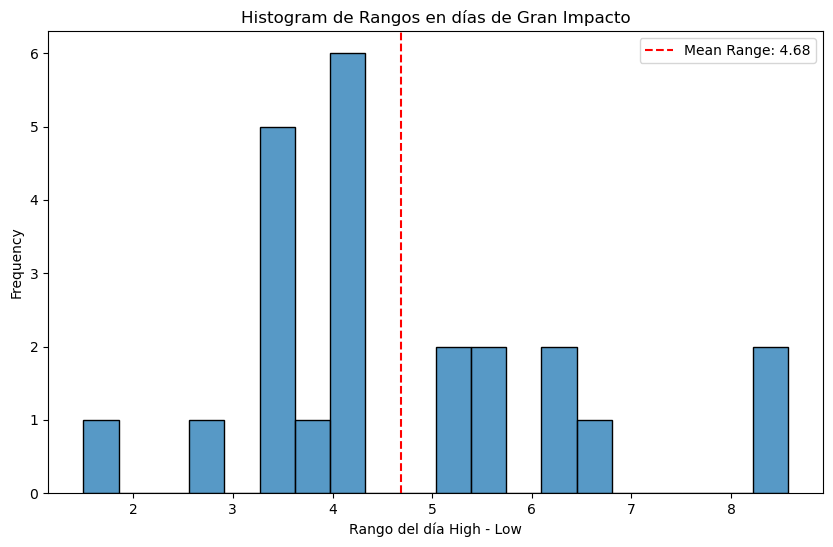

In [30]:
# Plot the histogram for filtered_df with the mean value line
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['range'], bins=20, kde=False)
plt.title('Histogram de Rangos en días de Gran Impacto')
plt.xlabel('Rango del día High - Low')
plt.ylabel('Frequency')
plt.axvline(mean_value_filtered, color='r', linestyle='--', label=f'Mean Range: {mean_value_filtered:.2f}')
plt.legend()
plt.show()

PARA TODO EL DATAFRAME

In [11]:
spx_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,range,Date_only,event
0,2021-08-27 00:00:00-04:00,427.784980,431.162329,427.727577,430.779633,77235100,0.0,0.0,0.0,3.43,2021-08-27,False
1,2021-08-30 00:00:00-04:00,431.468550,433.477744,431.219783,432.674072,48357400,0.0,0.0,0.0,2.26,2021-08-30,False
2,2021-08-31 00:00:00-04:00,432.578409,432.922827,431.420741,432.033051,59300200,0.0,0.0,0.0,1.50,2021-08-31,False
3,2021-09-01 00:00:00-04:00,432.989779,433.515983,432.023445,432.262634,48721400,0.0,0.0,0.0,1.49,2021-09-01,False
4,2021-09-02 00:00:00-04:00,433.716973,434.415387,432.367943,433.592590,42501000,0.0,0.0,0.0,2.05,2021-09-02,False
...,...,...,...,...,...,...,...,...,...,...,...,...
725,2024-07-18 00:00:00-04:00,558.510010,559.520020,550.429993,552.659973,56270400,0.0,0.0,0.0,9.09,2024-07-18,False
726,2024-07-19 00:00:00-04:00,552.419983,554.080017,547.909973,548.989990,65509100,0.0,0.0,0.0,6.17,2024-07-19,False
727,2024-07-22 00:00:00-04:00,553.000000,555.270020,551.020020,554.650024,43346700,0.0,0.0,0.0,4.25,2024-07-22,False
728,2024-07-23 00:00:00-04:00,554.539978,556.739990,553.280029,553.780029,34439600,0.0,0.0,0.0,3.46,2024-07-23,True


In [12]:
import numpy as np
from scipy.stats import pointbiserialr

# Calculate point biserial correlation
correlation, p_value = pointbiserialr(spx_df['event'].astype(int), spx_df['range'])

# Display the results
print(f"Point biserial correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Point biserial correlation coefficient: -0.04297302851063745
P-value: 0.24620628118146048


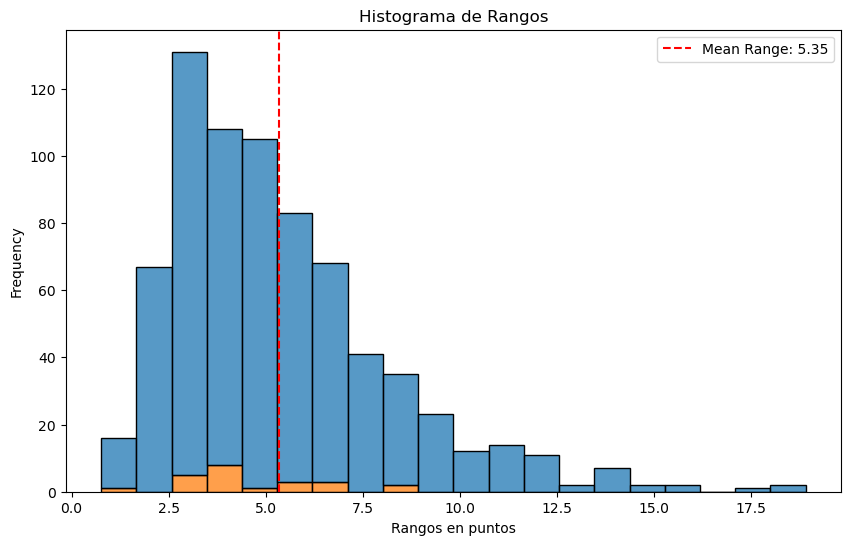

In [29]:
# Plot the histogram with hue
plt.figure(figsize=(10, 6))
sns.histplot(spx_df, x='range', bins=20, kde=False, hue='event', multiple="stack")
plt.title('Histograma de Rangos')
plt.xlabel('Rangos en puntos')
plt.ylabel('Frequency')
plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean Range: {mean_value:.2f}')
plt.legend()
plt.show()

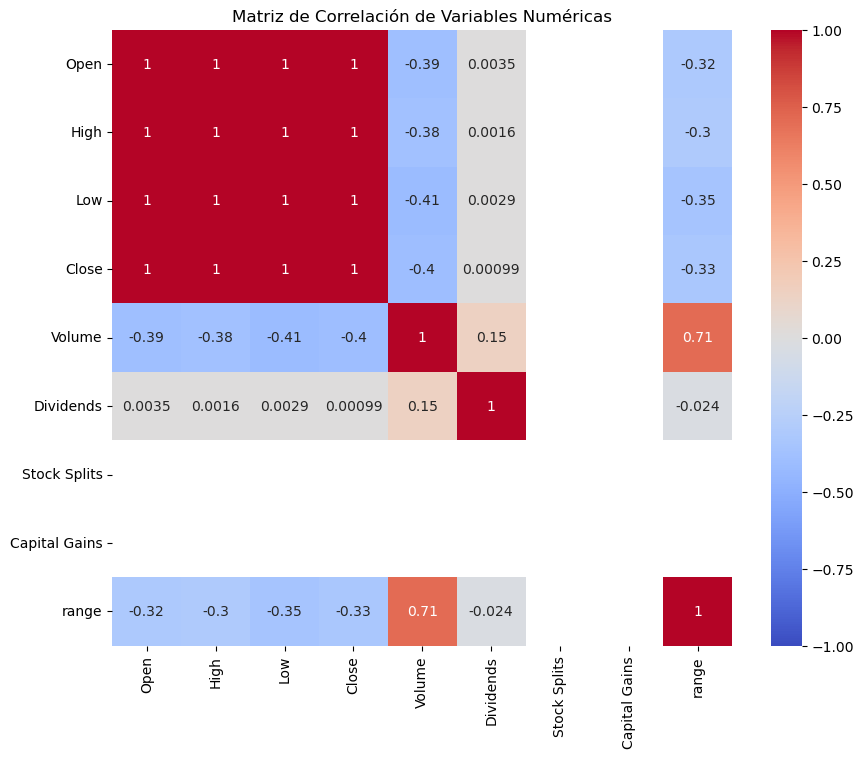

In [27]:
numeric_columns = spx_df.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
correlation_matrix = spx_df[numeric_columns].corr()

# Plot the heatmap with annotations and a color bar
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()